In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#데이터를 불러옴
(X_train, y_train),(X_test,y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],28,28,1 ).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],28,28,1 ).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#모델설정
model = Sequential()
#컨블루션 적용 : Cov2D
#      32는 커널의 갯수, (3,3)은 커널의 크기,     
#      input_shape = (행,열,색상 혹은 흑백) : (28,28,1)
#                                                    ㄴ 흑백이 1, 색상이면 3
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))

#맥스풀링적용 : MaxPolling2D
#pool_size를 통해 풀링창의 크기
#(2,2)는 가로2 세로2 크기의 풀링창을 통해 맥스풀링을 진행
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #노드를 25%끄고 사용
model.add(Flatten()) #2차원을 1차원으로 변경 (28,28) => (784,)

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#모델최적화
modelpath = './data/model/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath= modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델실행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=200, verbose=0, validation_split = 0.25, \
          callbacks=[early_stopping_callback, checkpointer])

#테스트 정확도를 출력
model.evaluate(X_test, y_test)[1]






Epoch 1: val_loss improved from inf to 0.07785, saving model to ./data/model\MNIST_CNN.hdf5


C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.07785 to 0.05807, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05807 to 0.05016, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05016 to 0.04176, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04176

Epoch 6: val_loss did not improve from 0.04176

Epoch 7: val_loss improved from 0.04176 to 0.04058, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04058

Epoch 9: val_loss improved from 0.04058 to 0.03964, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.03964 to 0.03761, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.03761

Epoch 12: val_loss did not improve from 0.03761

Epoch 13: val_loss did not improve from 0.03761

Epoch 14: val_loss did not improve from 0.03761

Epoch 15: val_loss did not improve from 0.03761

Epoch 16: val_loss did not 

0.9908000230789185

In [8]:
#순환 신경망(Recurrent Neural Network, RNN) => LSTM(Long Short Term Memory)
#입력된 값에 맞는 결과를 가져올때 까지 한 곳에서 순환하는것
# 첫번째 입력값에 맞는 결과값이 나올때까지 계속 순환
#첫번째 입력값에 대한 결과와 같이 두번째 입력값으로 맞는 결과를 가져올 때까지 순환
#첫번째 결과값 그리고 두번째 결과값과 함께 세번째 입력값에 맞는 결과를 가져올 때까지 순환
#이와 같은 방법으로 반복해서 결과를 출력
#RNN은 앞의 결과에 따라 뒤 입력값에 영향을 준다
#앞의 결과값을 관리할 필요가 있어서 LSTM을 이용해 결과값을 관리하게 한다

In [ ]:
from PIL import Image
# 이미지 전처리
image_path = 'img6.jpg'
image = Image.open(image_path)
image = image.convert('L')  # 흑백 이미지로 변환
image = image.resize((28, 28))  # 28x28 크기로 조정
image = np.asarray(image)
image = image.reshape(1, 28,28,1).astype('float32') / 255
if image[0,0,0,0] > 0:
    image = abs(1 - image)
# 예측하기
prediction = model.predict(image)
digit = np.argmax(prediction)
print("예측 결과:", digit)

In [20]:
# 로이터 뉴스 데이터셋
from tensorflow.keras.datasets import reuters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np
# 데이터 불러오기
# 학습셋, 테스트셋
(X_train, y_train),(X_test, y_test) = \
                            reuters.load_data(num_words=1000, test_split = 0.2) 
# 카테고리 갯수
# 카테고리의 번호 : [0,1,2,3,4,5,..., 45]
np.max(y_train) + 1 # 
# 단어의 수를 맞어주기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 모델의 구조
model = Sequential()
#      Embedding(불러온 단어의 총수,기사당 단어 수)
model.add(Embedding(1000,100))
#         LSTM(기사당 단어 수, 기타 옵션) 
# LSTM를 사용한 경우 활성 함수는 tanh
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation="softmax"))
# 학습의 조기 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 모델의 실행
model.compile(loss="categorical_crossentropy" , optimizer="adam", 
             metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=20, epochs=200, \
         validation_data=(X_test, y_test),callbacks=[early_stopping_callback])
# validation_split=0.25
# 테스트 정확도
model.evaluate(X_test, y_test)[1]

Epoch 1/200
450/450 [==============================] - 13s 24ms/step - loss: 2.2693 - accuracy: 0.4269 - val_loss: 2.0160 - val_accuracy: 0.5076
Epoch 2/200
450/450 [==============================] - 10s 23ms/step - loss: 1.9127 - accuracy: 0.5120 - val_loss: 1.7928 - val_accuracy: 0.5579
Epoch 3/200
450/450 [==============================] - 11s 24ms/step - loss: 1.6835 - accuracy: 0.5741 - val_loss: 1.6056 - val_accuracy: 0.6144
Epoch 4/200
450/450 [==============================] - 10s 23ms/step - loss: 1.4755 - accuracy: 0.6298 - val_loss: 1.4464 - val_accuracy: 0.6460
Epoch 5/200
450/450 [==============================] - 10s 23ms/step - loss: 1.3312 - accuracy: 0.6631 - val_loss: 1.3955 - val_accuracy: 0.6443
Epoch 6/200
450/450 [==============================] - 10s 23ms/step - loss: 1.2065 - accuracy: 0.7029 - val_loss: 1.2260 - val_accuracy: 0.6950
Epoch 7/200
450/450 [==============================] - 10s 23ms/step - loss: 1.0823 - accuracy: 0.7310 - val_loss: 1.2171 - val_ac

0.7261798977851868

In [23]:
#LSTM과 CNN(컨볼루션)의 조합을 이용한 영화리뷰 분류
from tensorflow.keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import sequence
import numpy as np

#데이터를 불러와 학습셋/테스트셋으로 나누기
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=5000)

#단어의 수를 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

#모델구조 설정
model = Sequential()
model.add(Embedding(5000,100)) #RNN
model.add(Dropout(0.5))
#Conv2D : 2차원
#Conv1D : 1차원

model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1)) #CNN
model.add(MaxPooling1D(pool_size=4)) #CNN
model.add(LSTM(55)) #LSTM
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.add(Dense(1, activation='sigmoid'))

#학습의 조기중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

#모델의 실행 옵션
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#테스트 정확도
model.evaluate(X_test, y_test)


782/782 [==============================] - 11s 12ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693166196346283, 0.5]

1/1 [==============================] - 0s 92ms/step
0.7093644738197327 0.6578711867332458
1/1 [==============================] - 0s 25ms/step
0.4960985332727432 0.408461332321167
1/1 [==============================] - 0s 24ms/step
0.4916434623301029 0.16446109116077423
1/1 [==============================] - 0s 31ms/step
0.5277014132589102 0.07951526343822479
1/1 [==============================] - 0s 24ms/step
0.525455447845161 0.08720505237579346
1/1 [==============================] - 0s 29ms/step
0.4917972842231393 0.1650250256061554
1/1 [==============================] - 0s 26ms/step
0.456772793084383 0.31977060437202454
1/1 [==============================] - 0s 27ms/step
0.46095066517591476 0.44697660207748413
1/1 [==============================] - 0s 24ms/step
0.4750402718782425 0.48419061303138733
1/1 [==============================] - 0s 24ms/step
0.4781424254179001 0.4770047068595886
1/1 [==============================] - 0s 24ms/step
0.45788712799549103 0.457597017288208
1/1 [=

C:\Users\sdedu\AppData\Local\Temp\ipykernel_5100\1522424711.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(5,5)


1/1 [==============================] - 0s 26ms/step
0.13793213665485382 0.1761484444141388
1/1 [==============================] - 0s 29ms/step
0.09017073176801205 0.14343298971652985
1/1 [==============================] - 0s 26ms/step
0.07555247470736504 0.20756104588508606
1/1 [==============================] - 0s 25ms/step
0.056958384811878204 0.5606065392494202
1/1 [==============================] - 0s 25ms/step
0.12017154693603516 0.12955832481384277
1/1 [==============================] - 0s 26ms/step
0.12584957666695118 0.4021073579788208


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000211F5D2F060>
Traceback (most recent call last):
  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


1/1 [==============================] - 0s 24ms/step
0.11784753203392029 0.4921967387199402
1/1 [==============================] - 0s 25ms/step
0.24813641607761383 0.09277792274951935
1/1 [==============================] - 0s 26ms/step
0.2897765599191189 1.7440613508224487
1/1 [==============================] - 0s 30ms/step
1.247563511133194 0.05929705873131752


KeyboardInterrupt: 

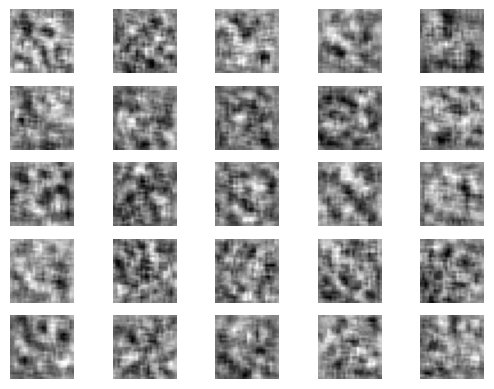

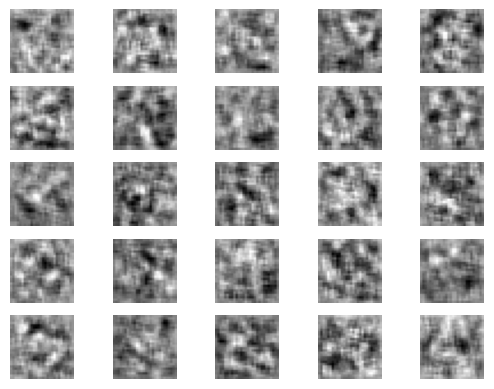

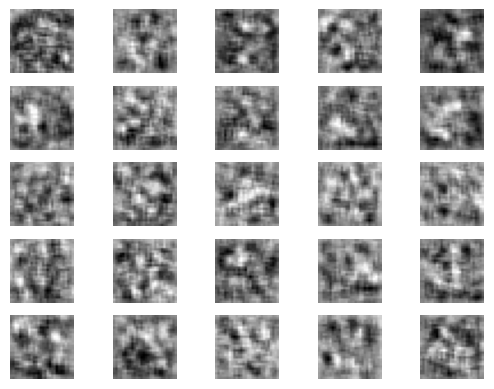

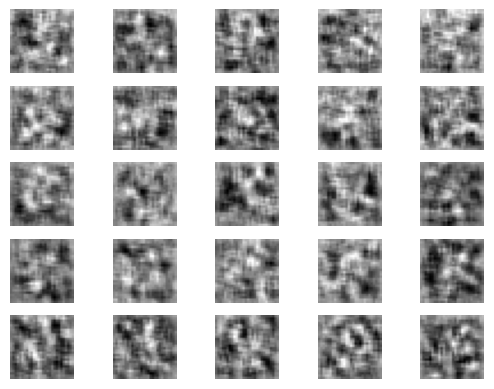

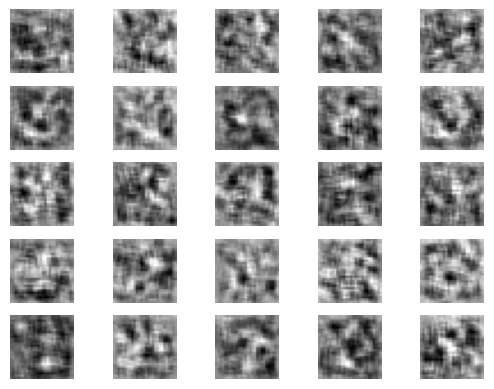

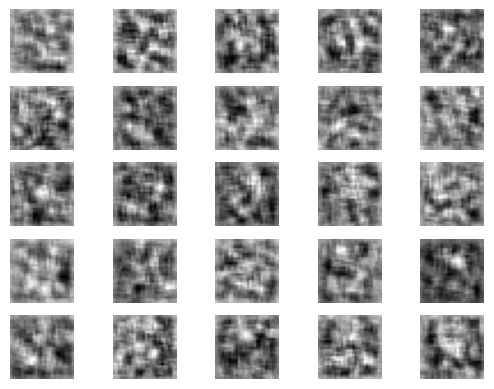

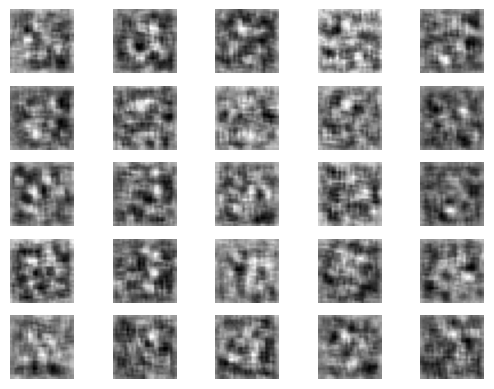

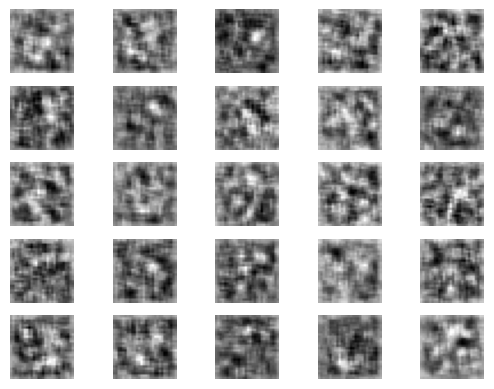

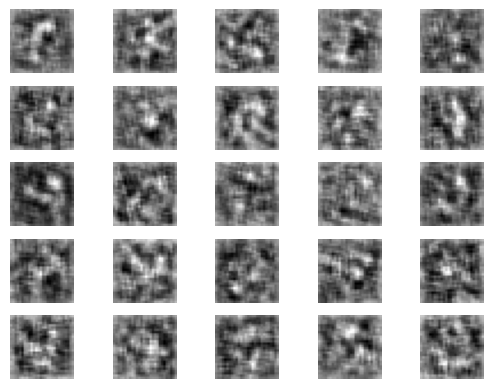

Error in callback <function flush_figures at 0x000002119570BA60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [51]:
#손글씨
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout, Flatten
from tensorflow.keras.layers import Reshape, UpSampling2D, Conv2D, Activation, Input
import numpy as np
import matplotlib.pyplot as plt

#모델생성
#생성자 모델
generator = Sequential()

#128은 임의의 수(128이 아니어도됨), 100차원으로입력 (100이 아니어도됨)
#GAN에서는 relu함수가 불안해서 LeakyReLU함수 사용
#이미지 크기 28*28이므로 7*7
generator.add(Dense(128*7*7, input_dim=100, activation='LeakyReLU'))
generator.add(BatchNormalization())
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D()) #7 * 7인 이미지를 14 * 14로 확장
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D()) #14 * 14인 이미지가 28 * 28
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

#판별자 모델
disciminator = Sequential()
#컨볼루션을 이용해서 만듬
disciminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding='same'))
disciminator.add(Activation(LeakyReLU(0.2)))
disciminator.add(Dropout(0.3))
disciminator.add(Conv2D(128,kernel_size=5,strides=2, padding='same'))
disciminator.add(Activation(LeakyReLU(0.2)))
disciminator.add(Dropout(0.3))
disciminator.add(Flatten())
disciminator.add(Dense(1, activation='sigmoid'))

#판별자실행
disciminator.compile(optimizer='adam', loss='binary_crossentropy')

#판별자는 학습x
disciminator.trainable = False;

#생산자와 판별자 모델을 연결시키는 gan 모델 생성
ginput = Input(shape=(100,)) #input_dim=100
#판별자에게 생산자가 만든 값 전달
dis_output = disciminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

epoch = 2001
batch_size = 32 #몇개의 가상 이미지를 판별자에게 넣을지 결정하는 변수

#MNIST데이터 불러오기
(X_train, _),(_,_) = mnist.load_data() #학습셋만 필요
#가로세로 28픽셀, 흑색 = 1
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
# -1 ~ 1사이의 값을 가지도록
X_train = (X_train - 127) / 127

# 참/거짓 판별을 위한 32행 1열
true = np.ones((batch_size,1)) 
fake = np.zeros((batch_size,1))

for i in range(epoch):
    #실제 데이터를 판별자에 입력하는 부분
    #판별자에게 이미지를 랜덤으로 전달
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    #손글씨 이미지를 랜덤으로 불러옴
    imgs = X_train[idx]
    #랜덤으로 불러온 이미지를 판별자에게 전달
    d_loss_real = disciminator.train_on_batch(imgs, true)

    #임의의 숫자데이터 0~1
    noise = np.random.normal(0,1,(batch_size,100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = disciminator.train_on_batch(gen_imgs, fake)

    #판별자와 생상자의 오차 계산
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = gan.train_on_batch(noise, true)
    print(d_loss, g_loss)

    
    noise = np.random.normal(0,1,(25,100))
    gen_imgs = generator(noise)

    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(5,5)
    count = 0
    for j in range(5):
        for k in range(5):
            axs[j,k].imshow(gen_imgs[count, : , : , 0], cmap='gray')
            axs[j,k].axis('off')
            count += 1
        fig.savefig(f'./data/gan_images/gan_mnist_{i}.png')

In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer

#입력 테스트에 대한 토크나이저 피팅 수정
input_text = ['오늘 출근길에 차 사고가 났습니다.']
tokenizer = Tokenizer(num_words=1000)

#X_train이 아닌 input_text에 대해 피팅하도록 변경
tokenizer.fit_on_texts(input_text)

input_sequence = tokenizer.texts_to_sequences(input_text)
input_sequence_padded = pad_sequences(input_sequence, maxlen=100)

#훈련된 모델을 사용하여 예측
predictions = model.predict(input_sequence_padded)

#예측된 카테고리 인덱스 가져오기
predicted_category_index = np.argmax(predictions[0])

#인덱스를 원래 카테고리로 매핑
print(f'예측된 카테고리 인덱스 : {predicted_category_index}')

1/1 [==============================] - 0s 372ms/step
예측된 카테고리 인덱스 : 0
